In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from xgboost import plot_importance
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics

from sklearn import metrics
from sklearn.metrics import RocCurveDisplay

In [2]:
data_x = pd.read_csv("cv_x_under.csv")

In [3]:
data_x

,Unnamed: 0,T,delta_t,CT,prop_s,t_sys,t_dia,t_ratio,prop_delta_t,t_p1in_dia,...,Smoking status_Prefer not to answer,Smoking status_Previous,Sex_Female,Sex_Male,Ethnic background_Asian,Ethnic background_Black,Ethnic background_other including mixed,Ethnic background_white/not recorded,bp medication_0.0,bp medication_1.0
0,0,0.80270,0.12973,0.202700,0.25253,0.28378,0.51892,0.54688,0.16162,0.17027,...,0,0,0,1,0,0,0,1,1,0
1,1,0.80270,0.14595,0.210810,0.26263,0.30811,0.49459,0.62295,0.18182,0.18649,...,0,0,1,0,0,1,0,0,1,0
2,2,0.76154,0.12308,0.200000,0.26263,0.28462,0.47692,0.59677,0.16162,0.16154,...,0,1,0,1,0,0,0,1,0,1
3,3,0.94286,0.31429,0.095238,0.10101,0.35238,0.59048,0.59677,0.33333,0.27619,...,0,0,0,1,0,0,0,1,1,0
4,4,0.71566,0.22410,0.231330,0.32323,0.42651,0.28916,1.47500,0.31313,0.36867,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20597,20597,0.71566,0.11566,0.180720,0.25253,0.25301,0.46265,0.54688,0.16162,0.15904,...,0,0,0,1,0,0,0,1,1,0
20598,20598,1.06070,0.19286,0.225000,0.21212,0.36429,0.69643,0.52308,0.18182,0.22500,...,0,0,1,0,0,0,0,1,1,0
20599,20599,0.90000,0.20000,0.218180,0.24242,0.32727,0.57273,0.57143,0.22222,0.22727,...,0,1,1,0,0,0,0,1,1,0
20600,20600,0.95806,0.13548,0.261290,0.27273,0.35806,0.60000,0.59677,0.14141,0.20323,...,0,1,0,1,0,0,0,1,1,0


In [5]:
data_crf_pw = data_x.iloc[:, 1:65]

In [6]:
data_crf_pw.head()

,T,delta_t,CT,prop_s,t_sys,t_dia,t_ratio,prop_delta_t,t_p1in_dia,t_p2in_dia,...,Smoking status_Prefer not to answer,Smoking status_Previous,Sex_Female,Sex_Male,Ethnic background_Asian,Ethnic background_Black,Ethnic background_other including mixed,Ethnic background_white/not recorded,bp medication_0.0,bp medication_1.0
0,0.80270,0.12973,0.202700,0.25253,0.28378,0.51892,0.54688,0.16162,0.17027,0.12973,...,0,0,0,1,0,0,0,1,1,0
1,0.80270,0.14595,0.210810,0.26263,0.30811,0.49459,0.62295,0.18182,0.18649,0.14595,...,0,0,1,0,0,1,0,0,1,0
2,0.76154,0.12308,0.200000,0.26263,0.28462,0.47692,0.59677,0.16162,0.16154,0.12308,...,0,1,0,1,0,0,0,1,0,1
3,0.94286,0.31429,0.095238,0.10101,0.35238,0.59048,0.59677,0.33333,0.27619,0.16190,...,0,0,0,1,0,0,0,1,1,0
4,0.71566,0.22410,0.231330,0.32323,0.42651,0.28916,1.47500,0.31313,0.36867,0.12289,...,0,0,1,0,0,0,0,1,1,0


In [7]:
data_crf_pw.shape

(20602, 64)

In [8]:
data_crf_pw.size

1318528

In [9]:
X = data_crf_pw.values

In [10]:
X

array([[0.8027 , 0.12973, 0.2027 , ..., 1.     , 1.     , 0.     ],
       [0.8027 , 0.14595, 0.21081, ..., 0.     , 1.     , 0.     ],
       [0.76154, 0.12308, 0.2    , ..., 1.     , 0.     , 1.     ],
       ...,
       [0.9    , 0.2    , 0.21818, ..., 1.     , 1.     , 0.     ],
       [0.95806, 0.13548, 0.26129, ..., 1.     , 1.     , 0.     ],
       [1.1647 , 0.14118, 0.28235, ..., 1.     , 0.     , 1.     ]])

In [11]:
X.shape

(20602, 64)

In [12]:
X.size

1318528

In [13]:
# reading the output variable

In [14]:
data_y = pd.read_csv("cv_y_under.csv")

In [15]:
data_y = data_y.drop(['Unnamed: 0'], axis=1)

In [16]:
data_y.head()

,cv
0,0
1,0
2,0
3,0
4,0


In [17]:
y = data_y.values

In [18]:
y[:10]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=int64)

In [19]:
y.shape

(20602, 1)

In [20]:
y.size

20602

In [21]:
# nested cv

In [22]:
cv_outer = KFold(n_splits=3, shuffle=True, random_state=42)

best_auc = []
predict_prob = []
feature_imp = []

best auc score is : 
0.7333013048526751
[[0.6029599  0.39704013]
 [0.3626685  0.6373315 ]
 [0.65000093 0.34999907]
 ...
 [0.26887637 0.7311236 ]
 [0.3474813  0.6525187 ]
 [0.39218378 0.6078162 ]]
accuracy on test data: 
0.668025626092021
[[2168 1286]
 [ 994 2420]]
              precision    recall  f1-score   support

           0       0.69      0.63      0.66      3454
           1       0.65      0.71      0.68      3414

    accuracy                           0.67      6868
   macro avg       0.67      0.67      0.67      6868
weighted avg       0.67      0.67      0.67      6868

feature importances are: 
[0.00718777 0.00747187 0.00643882 0.02424586 0.01293405 0.00759067
 0.01527025 0.00484842 0.00740781 0.00814805 0.01006286 0.0068118
 0.00563556 0.0067856  0.00494164 0.0074306  0.00696332 0.005282
 0.00554652 0.00772007 0.01760774 0.00719202 0.00920184 0.0048122
 0.00877839 0.00485834 0.00618507 0.02241566 0.01500342 0.00794539
 0.00958799 0.00605717 0.00738709 0.01439904 0.0126

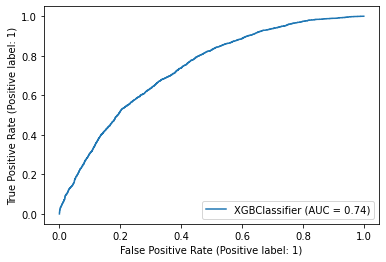

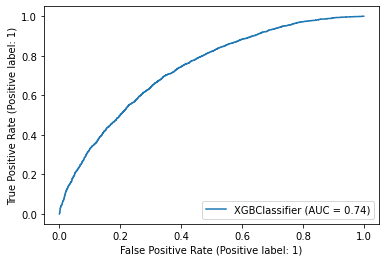

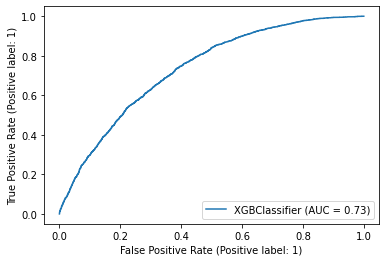

In [23]:
for train_ix, test_ix in cv_outer.split(X):
	# split data
	X_train, X_test = X[train_ix, :], X[test_ix, :]
	y_train, y_test = y[train_ix], y[test_ix]
	# configure the cross-validation procedure
	cv_inner = KFold(n_splits=3, shuffle=True, random_state=42)
	# define the model
	model = XGBClassifier(objective= 'binary:logistic', random_state=42)
	# define search space
	space = dict()
	space['n_estimators'] = [100, 250, 500, 750]
	space['max_depth'] = [3, 5, 10, 15]
	space['learning_rate'] = [0.3, 0.1, 0.01]
	space['colsample_bytree'] = [0.5, 0.8]
	# define search
	search = GridSearchCV(model, space, scoring='roc_auc', cv=cv_inner, refit=True)
	# execute search
	result = search.fit(X_train, y_train)
	roc_auc_score = result.best_score_
	print("best auc score is : ")
	print(roc_auc_score)
	best_auc.append(roc_auc_score)
	# get the best performing model fit on the whole training set
	best_model = result.best_estimator_
	# evaluate model on the hold out dataset
	yhat = best_model.predict(X_test)
	# predict proba
	y_pred_proba = best_model.predict_proba(X_test)
	print(y_pred_proba)    
	predict_prob.append(y_pred_proba)
	# evaluate the model
	acc_on_test = accuracy_score(y_test, yhat)
	print("accuracy on test data: ")
	print(acc_on_test)
	# store the result
	# cm
	cm = confusion_matrix(y_test, yhat)
	# 
	print(cm)
	# class report
	classif_report = classification_report(y_test, yhat)
	print(classif_report)
	#
	RocCurveDisplay.from_estimator(best_model, X_test, y_test)
	# feature_importances_
	f_i = best_model.feature_importances_
	print("feature importances are: ")
	print(f_i)
	feature_imp.append(f_i)
	# best parameters
	print("best parametrs: ")    
	print(result.best_params_)

In [24]:
best_auc

[0.7333013048526751, 0.7314617688824857, 0.7353269207760255]

In [25]:
round(mean(best_auc),2)

0.73

In [26]:
# sensitivity and specificity

In [27]:
# sensitivity for class '0' which is also specificity

In [28]:
sensitivity_class_zero = [0.63, 0.63, 0.64]

In [29]:
print("sensitivity of class zero: ", round(mean(sensitivity_class_zero),2))

sensitivity of class zero:  0.63


In [30]:
# sensitivity for class one

In [31]:
sensitivity_class_one = [0.71, 0.72, 0.70]

In [32]:
print("sensitivity of class one: ", round(mean(sensitivity_class_one),2))

sensitivity of class one:  0.71


In [33]:
# feature importance

In [34]:
feature_imp

[array([0.00718777, 0.00747187, 0.00643882, 0.02424586, 0.01293405,
        0.00759067, 0.01527025, 0.00484842, 0.00740781, 0.00814805,
        0.01006286, 0.0068118 , 0.00563556, 0.0067856 , 0.00494164,
        0.0074306 , 0.00696332, 0.005282  , 0.00554652, 0.00772007,
        0.01760774, 0.00719202, 0.00920184, 0.0048122 , 0.00877839,
        0.00485834, 0.00618507, 0.02241566, 0.01500342, 0.00794539,
        0.00958799, 0.00605717, 0.00738709, 0.01439904, 0.0126753 ,
        0.00745294, 0.01171342, 0.00706934, 0.01405134, 0.02884346,
        0.0292593 , 0.00947815, 0.00568122, 0.00783831, 0.00725902,
        0.07695029, 0.02643902, 0.01950802, 0.02033434, 0.02250043,
        0.        , 0.02375042, 0.01658232, 0.01433071, 0.        ,
        0.        , 0.06055457, 0.04941668, 0.        , 0.        ,
        0.        , 0.00648481, 0.10080805, 0.11086365], dtype=float32),
 array([0.00783542, 0.00620253, 0.00806714, 0.01129803, 0.00897973,
        0.00792734, 0.00867067, 0.00754376,

In [35]:
df_FI_0 = pd.DataFrame(feature_imp[0], columns = ['first'])
df_FI_1 = pd.DataFrame(feature_imp[1], columns = ['second'])
df_FI_2 = pd.DataFrame(feature_imp[2], columns = ['third'])

In [36]:
df_final_FI = pd.concat([df_FI_0, df_FI_1, df_FI_2], axis = 1)

In [37]:
df_final_FI

,first,second,third
0,0.007188,0.007835,0.007152
1,0.007472,0.006203,0.007388
2,0.006439,0.008067,0.007366
3,0.024246,0.011298,0.008913
4,0.012934,0.008980,0.009595
...,...,...,...
59,0.000000,0.000000,0.012555
60,0.000000,0.000000,0.000000
61,0.006485,0.006465,0.005039
62,0.100808,0.106976,0.100026


In [38]:
df_final_FI.to_csv("FI_values_cv_crf_plus_pw.csv")

In [44]:
# pred prob

In [40]:
df_predict_0 = pd.DataFrame(predict_prob[0], columns = ['first_0','first_1'])
df_predict_1 = pd.DataFrame(predict_prob[1], columns = ['second_0','second_1'])
df_predict_2 = pd.DataFrame(predict_prob[2], columns = ['third_0','third_1'])

In [41]:
df_final_pred = pd.concat([df_predict_0, df_predict_1, df_predict_2], axis = 1)

In [42]:
df_final_pred

,first_0,first_1,second_0,second_1,third_0,third_1
0,0.602960,0.397040,0.304788,0.695212,0.800321,0.199679
1,0.362669,0.637331,0.460806,0.539194,0.824323,0.175677
2,0.650001,0.349999,0.516524,0.483476,0.631242,0.368758
3,0.445062,0.554938,0.512973,0.487027,0.880091,0.119909
4,0.276152,0.723848,0.553566,0.446434,0.723673,0.276327
...,...,...,...,...,...,...
6863,0.537658,0.462342,0.431852,0.568148,0.439017,0.560983
6864,0.390352,0.609648,0.136890,0.863110,0.316144,0.683856
6865,0.268876,0.731124,0.430887,0.569113,0.368494,0.631506
6866,0.347481,0.652519,0.630160,0.369840,0.180385,0.819615


In [43]:
df_final_pred.to_csv("prob_values_cv_crf_plus_pw.csv")

In [2]:
# Getting AUC from outer loop, average over 3 folds

In [3]:
auc_outer_loop = [0.74, 0.74, 0.73]

In [4]:
auc_outer_loop_mean = round(mean(auc_outer_loop),2)

In [5]:
print(auc_outer_loop_mean)

0.74
